In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


l and b are galatic coordinates

ecl_log and ecl_lat are ecliptic longitude / ecliptic latitude

But the actual main data I think is ra = right assencetion, dec = declination, and parallax which we can get distance from. I vote we use this, but tbh I'm not sure what the difference between all 3 are

In [21]:
df = pd.read_csv("GaiaSource-1000172165251650944-1000424567594791808.csv", skiprows=0, 
                 usecols=['l', 'b', 'ecl_lon','ecl_lat', 'ra', 'dec','parallax'])
data = df.as_matrix()

l   = data[:,0] #store data as numpy arryays because it's easier to work with 
b   = data[:,1] #this is bad for performance and for future.
lon = data[:,2]
lat = data[:,3]
ra  = data[:,4]
dec = data[:,5]
parallax = data[:,6]
radius = 1/parallax #in parsecs




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#convert to cartesian coorindates
x = np.cos(lat) * np.cos(lon)
y = np.cos(lat) * np.sin(lon)
z = np.sin(lat)


#declenation is latitude, ra is longitutde. Ask me what the difference between ra and lon is i dare you

x = np.cos(dec) * np.cos(ra)
y = np.cos(dec) * np.sin(ra)
z = np.sin(dec)


In [16]:
#lets look at less data -> This will take 5% of the data. 
x1 = []
y1 = []
z1 = []

for i in range(np.size(x)):
    if i % 50== 0:
        x1.append(x[i])
        y1.append(y[i])
        z1.append(z[i])

<IPython.core.display.Javascript object>


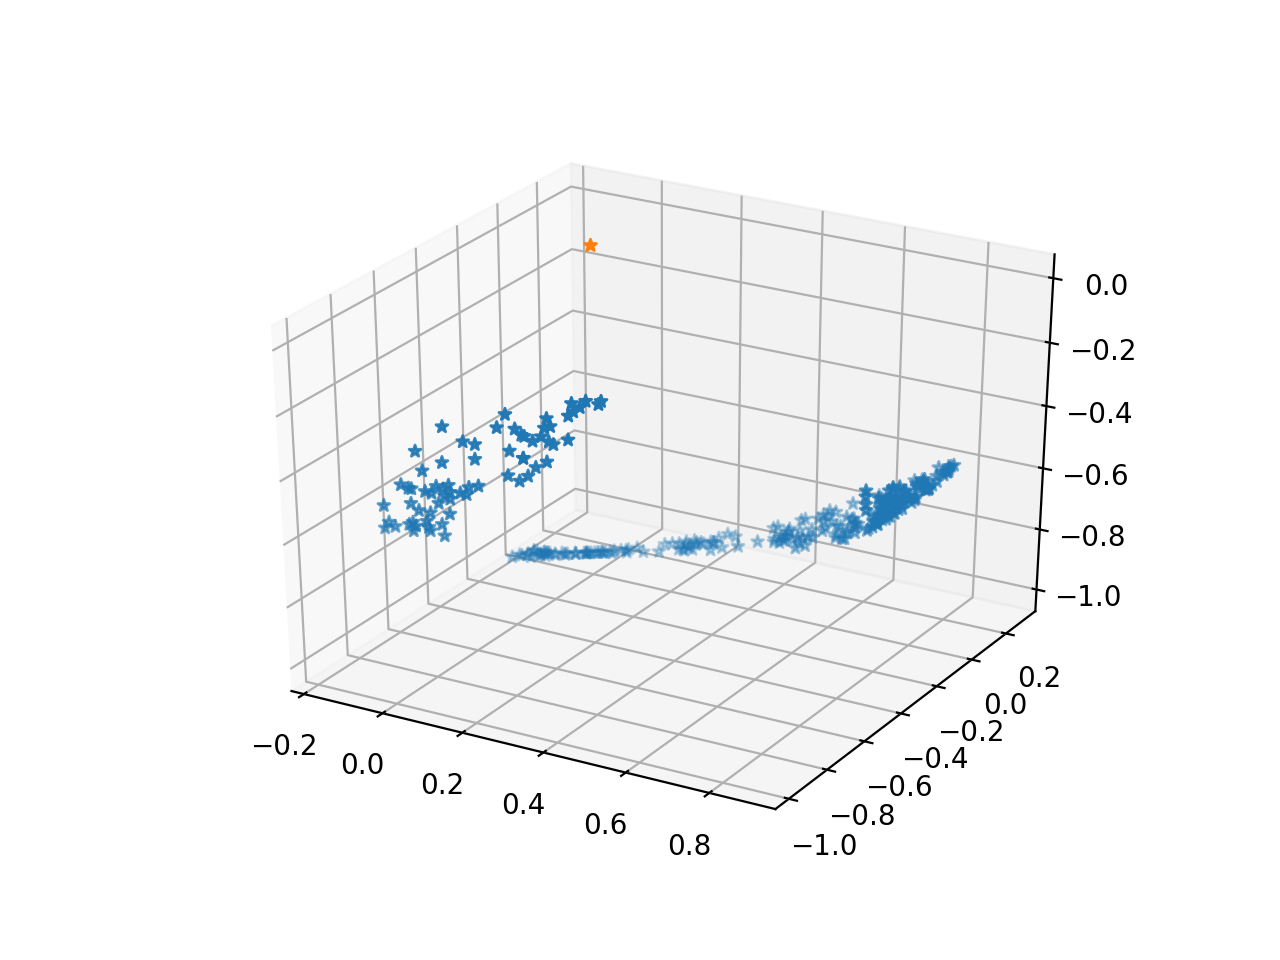

In [20]:
%matplotlib notebook 
fig = plt.figure() #^this will produce a figure that we can scroll around in
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, marker='*')
ax.scatter(0,0,0, marker='*')
plt.show()




Maybe we need more data?